In [23]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

In [24]:
class BatsmanState(TypedDict):
    runs:int
    balls:int
    fours:int
    sixes:int

    sr:float
    bpb:float
    boundary_percentage:float
    summary:str

In [25]:
def calculate_sr(state:BatsmanState)->BatsmanState:

    sr=(state['runs']/state['balls'])*100

    return {'sr':sr}

In [26]:
def calculate_bpb(state:BatsmanState)->BatsmanState:

    bpb=(state['fours']+state['sixes'])/state['balls']

    return {'bpb':bpb}


In [27]:
def calculate_boundary_percentage(state:BatsmanState)->BatsmanState:

    boundary_percentage=(((state['fours']*4)+(state['sixes']*6))/state['runs'])*100

    return {'boundary_percentage':boundary_percentage}

In [28]:
def summary(state:BatsmanState)->BatsmanState:
    summary=f"""
    Strike Rate: {state['sr']} \n
    Balls per boundary - {state['bpb']} \n
    Boundary percentage - {state['boundary_percentage']}
"""

    return {'summary':summary}

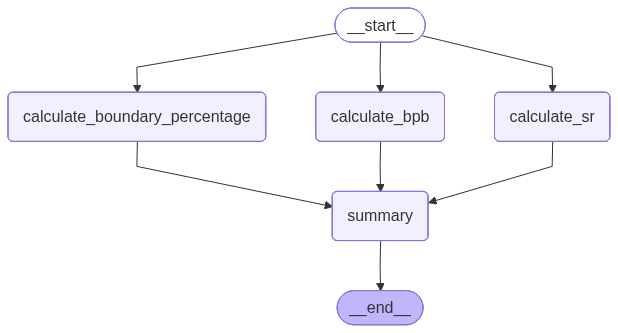

In [29]:
graph=StateGraph(BatsmanState)

#nodes
graph.add_node('calculate_sr',calculate_sr)
graph.add_node('calculate_bpb',calculate_bpb)
graph.add_node('calculate_boundary_percentage',calculate_boundary_percentage)
graph.add_node('summary',summary)


#edges
graph.add_edge(START,'calculate_sr')
graph.add_edge(START,'calculate_bpb')
graph.add_edge(START,'calculate_boundary_percentage')

graph.add_edge('calculate_sr','summary')
graph.add_edge('calculate_bpb','summary')
graph.add_edge('calculate_boundary_percentage','summary')

graph.add_edge('summary',END)

workflow=graph.compile()
workflow


In [30]:
initial_state={
    'runs':100,
    'balls':50,
    'fours':6,
    'sixes':4
}
workflow.invoke(initial_state)

{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'sr': 200.0,
 'bpb': 0.2,
 'boundary_percentage': 48.0,
 'summary': '\n    Strike Rate: 200.0 \n\n    Balls per boundary - 0.2 \n\n    Boundary percentage - 48.0\n'}